### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [ ]:
# Download this file 
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv"

<h2 id="reading_data">Reading the data in adnd Data exploration </h2>

In [ ]:
import os 
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")

<h2 id="exploratory_analysis">Exploratory data analysis </h2>

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

Lets select some features to explore more.


we can plot each of these features:


<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 


In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()

# Describe independent and dependent variables
ind = ['ENGINESIZE']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(len(ind)//3,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])

        
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# Fit the model
clf = linear_model.LinearRegression()
clf.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = clf.predict(test_x)



# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="multiple_regression">Multiple Regression Model</h2>

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()


# Describe independent and dependent variables
ind = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots(len(ind)//3,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])


train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])


# Fit the model
clf = linear_model.LinearRegression()
clf.fit (train_x, train_y)


# Prediction and the error estimation
test_y_hat = clf.predict(test_x)



# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="Polynomial_regression">Polynomial Regression Model</h2>

Coefficients:  [[ 0.         48.38805376 -1.23523613]]
Intercept:  [110.51029563]
Mean absolute error: 21.64
Residual sum of squares (MSE): 798.55
R2-score: 0.70


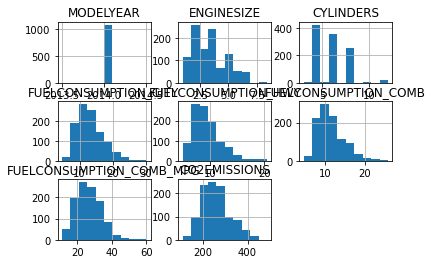

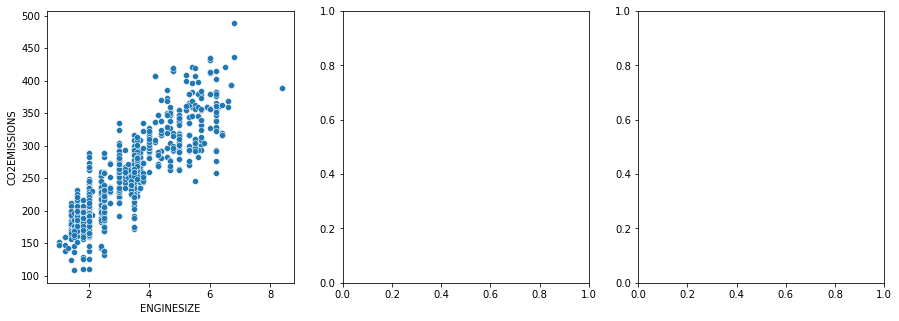

In [1]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("FuelConsumptionCo2.csv")
df.hist()

# Describe independent and dependent variables
ind = ['ENGINESIZE']
dep = ['CO2EMISSIONS']


# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]


# plot distributions 
for j in range(len(dep)):
    fig, axs = plt.subplots((len(ind)//3)+1,3,figsize=(15,5))
    for i in range(len(ind)):
        sns.scatterplot(x=df[ind[i]], y= df[dep[j]], ax=axs[i])
   
        
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])



# Polynomial transformation
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)


# Fit the model
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)


# Prediction and the error estimation on the transformed test polynomial data
test_x_poly = poly.fit_transform(test_x)
test_y_hat = clf.predict(test_x_poly)



# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

<h2 id="Nonlinear_regression">Nonlinear Regression Model</h2>

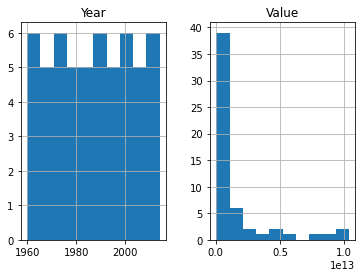

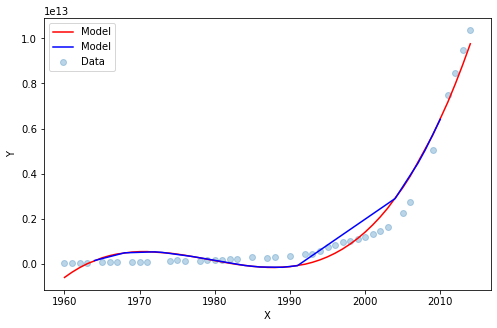

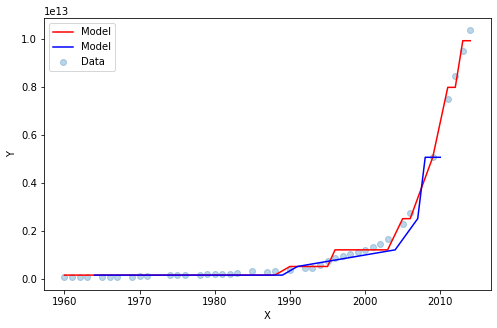

(<matplotlib.legend.Legend at 0x156985f3b20>, None)

In [33]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

import pylab as pl
import numpy as np
%matplotlib inline
import os, seaborn as sns

# Get data
os.chdir("C:\\Users\\manka\\Documents\\GitHub\\IBM-AI-ML-course")
df = pd.read_csv("china_gdp.csv")
df.hist()

# profile = ProfileReport(df)
# profile.to_widgets()

ind = ['Year']
dep = ['Value']

# Train test split with proportion split
msk = np.random.rand(len(df)) < 0.8
X, Y = df[ind], df[dep]
train_x, test_x, train_y, test_y = np.asanyarray(X[msk]), np.asanyarray(X[~msk]), np.asanyarray(Y[msk]), np.asanyarray(Y[~msk])



# Polynomial regressor 
model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())
model_1.fit(train_x.reshape(-1,1),train_y)

plt.figure(figsize = (8,5))
plt.scatter(train_x, train_y, alpha = .3, label = 'Data')
plt.plot(train_x, model_1.predict(train_x.reshape(-1,1)), color = 'red', label = 'Model')
plt.plot(test_x, model_1.predict(test_x.reshape(-1,1)), color = 'blue', label = 'Model')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()


#decisiontree regressor 
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(max_depth = 3)
model_2.fit(train_x.reshape(-1,1),train_y)

plt.figure(figsize = (8,5))
plt.scatter(train_x, train_y, alpha = .3, label = 'Data')
plt.plot(train_x, model_2.predict(train_x.reshape(-1,1)), color = 'red', label = 'Model')
plt.plot(test_x, model_2.predict(test_x.reshape(-1,1)), color = 'blue', label = 'Model')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend(), plt.show()



# Linear interpolation model
# from scipy import interpolate
# tck = interpolate.splrep(train_x, train_y, k=1, s=1, t = [35])
# plt.plot(x,interpolate.splev(train_x, tck, der=0), color = 'red', label = 'Model')